In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [2]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
df = pd.read_csv('spam_ham.csv', sep=';', encoding='latin-1')

In [4]:
df['Label'] = df['Label'].str.strip('"')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     5565 non-null   object
 1   SMS_TEXT  5562 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB
None


In [6]:
print(df['SMS_TEXT'].isnull().sum())

3


In [7]:
df = df.dropna(subset=['SMS_TEXT'])

In [8]:
df['SMS_TEXT'] = df['SMS_TEXT'].astype(str)

### Muestra eleatoria de 5 mensajes

In [9]:
print(df.sample(5))

     Label                                           SMS_TEXT
478    ham  When're you guys getting back? G said you were...
1655   ham  Yes I posted a couple of pics on fb. There's s...
4842   ham  Maybe you should find something else to do ins...
5188   ham  Darren was saying dat if u meeting da ge den w...
4403   ham  Ya but it cant display internal subs so i gott...


In [10]:
print("Cantidad total de mensajes:", len(df))

Cantidad total de mensajes: 5562


### Visualizaciones

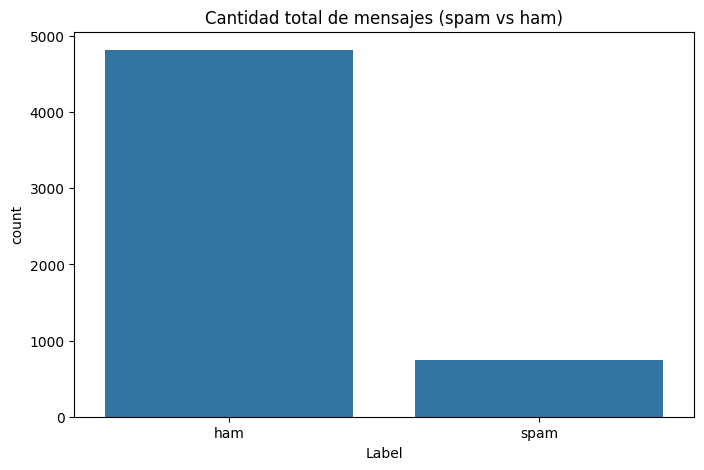

In [11]:
#cantidad total
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Label')
plt.title('Cantidad total de mensajes (spam vs ham)')
plt.show()

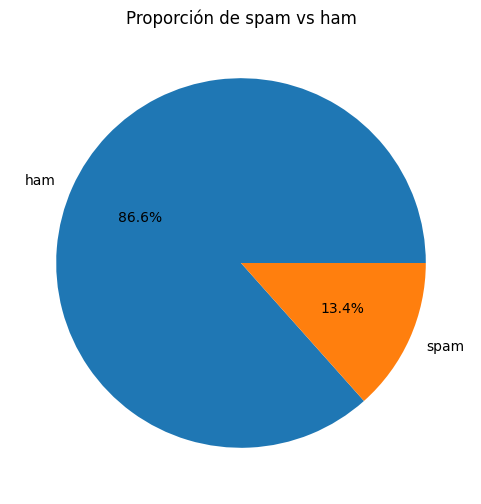

In [12]:
#proporción 
plt.figure(figsize=(6, 6))
df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de spam vs ham')
plt.ylabel('')
plt.show()

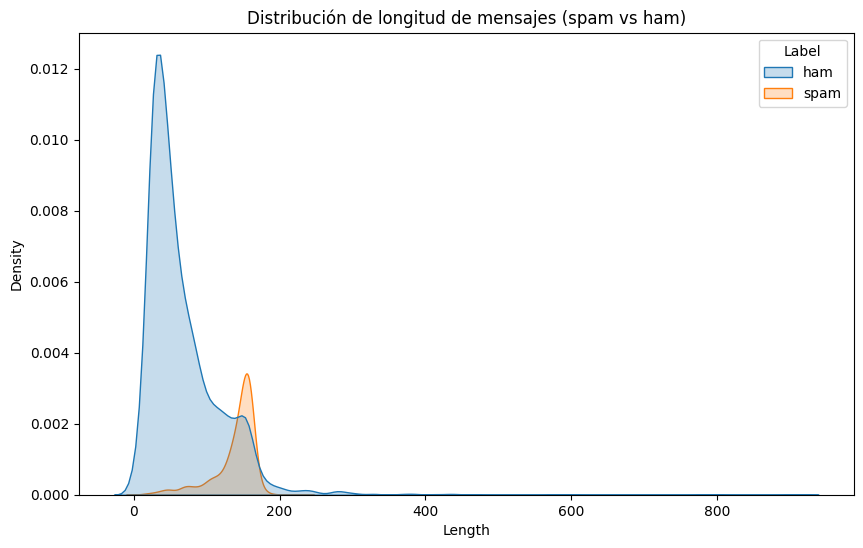

In [13]:
#densidad de longitud
df['Length'] = df['SMS_TEXT'].apply(len)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Length', hue='Label', fill=True)
plt.title('Distribución de longitud de mensajes (spam vs ham)')
plt.show()

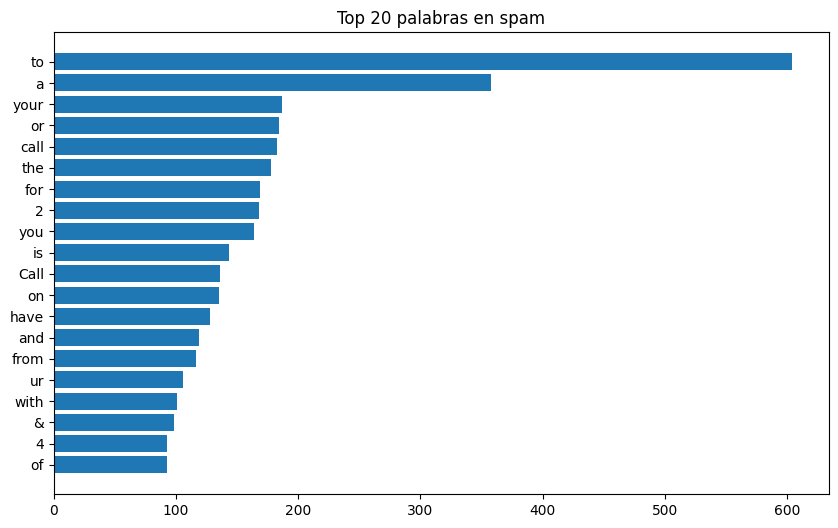

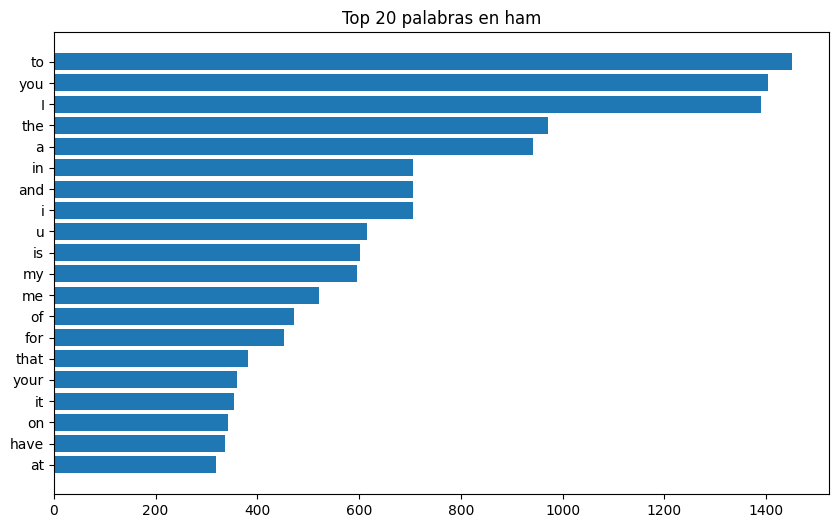

In [14]:
# 20 palabras más frecuentes
def plot_top_words(text_series, title):
    words = ' '.join(text_series).split()
    freq_dist = nltk.FreqDist(words)
    top_words = freq_dist.most_common(20)
    plt.figure(figsize=(10, 6))
    plt.barh([word[0] for word in top_words], [word[1] for word in top_words])
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()
plot_top_words(df[df['Label'] == 'spam']['SMS_TEXT'], 'Top 20 palabras en spam')
plot_top_words(df[df['Label'] == 'ham']['SMS_TEXT'], 'Top 20 palabras en ham')

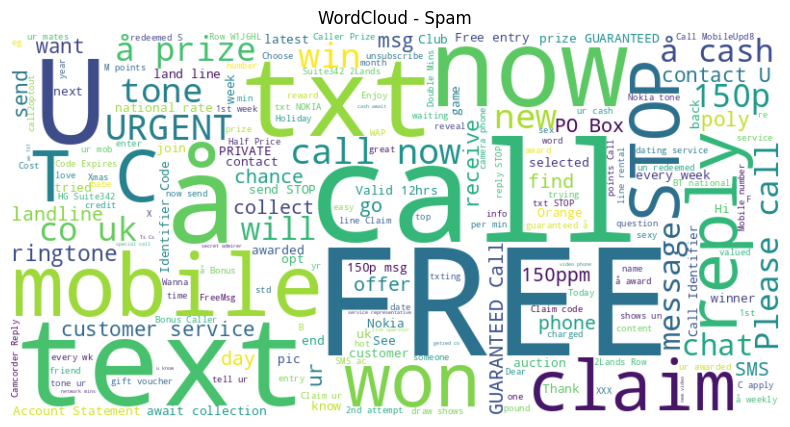

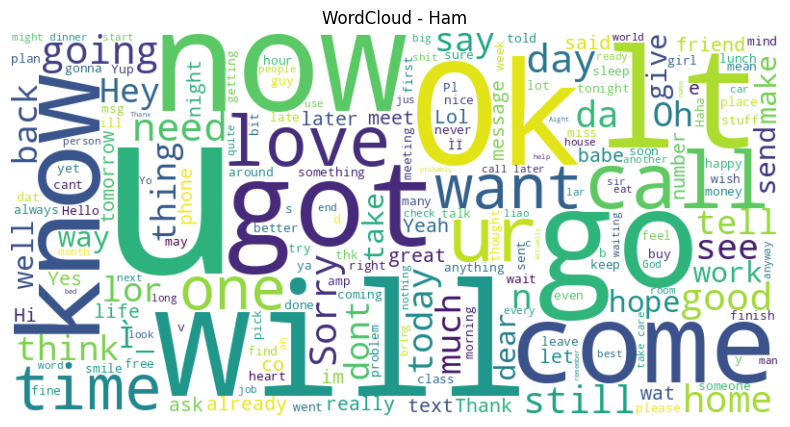

In [15]:
#wordcloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(' '.join(df[df['Label'] == 'spam']['SMS_TEXT']), 'WordCloud - Spam')
generate_wordcloud(' '.join(df[df['Label'] == 'ham']['SMS_TEXT']), 'WordCloud - Ham')

## Procesamiento de texto

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text) 
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word not in string.punctuation] 
    stop_words = set(stopwords.words('english'))

    tokens = [word for word in tokens if word not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

### posterior al procesamiento de texto

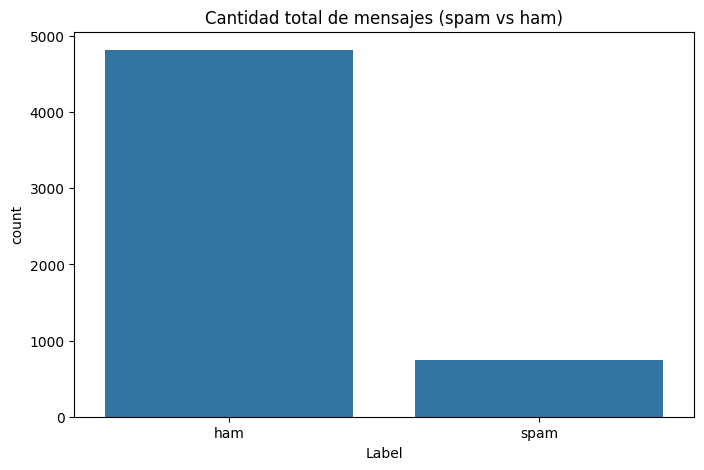

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Label')
plt.title('Cantidad total de mensajes (spam vs ham)')
plt.show()

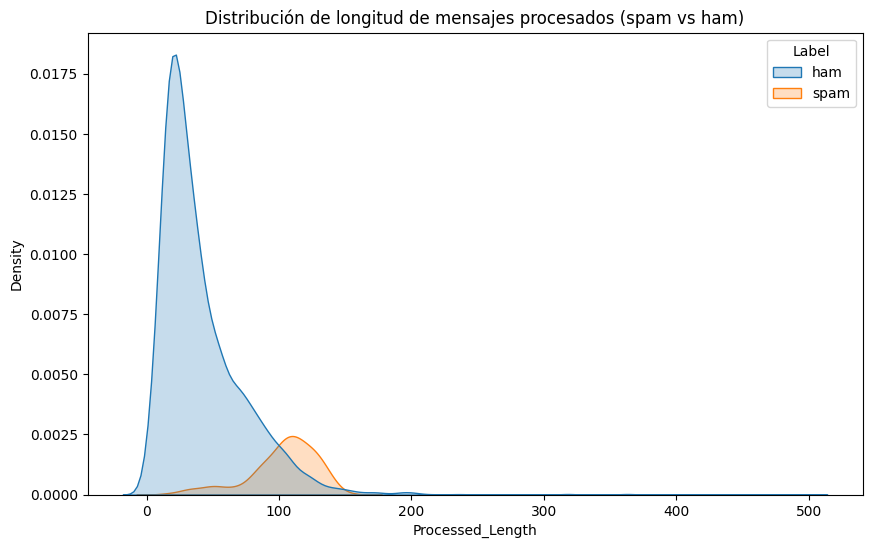

In [18]:
df['Processed_Length'] = df['Processed_Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Processed_Length', hue='Label', fill=True)
plt.title('Distribución de longitud de mensajes procesados (spam vs ham)')
plt.show()

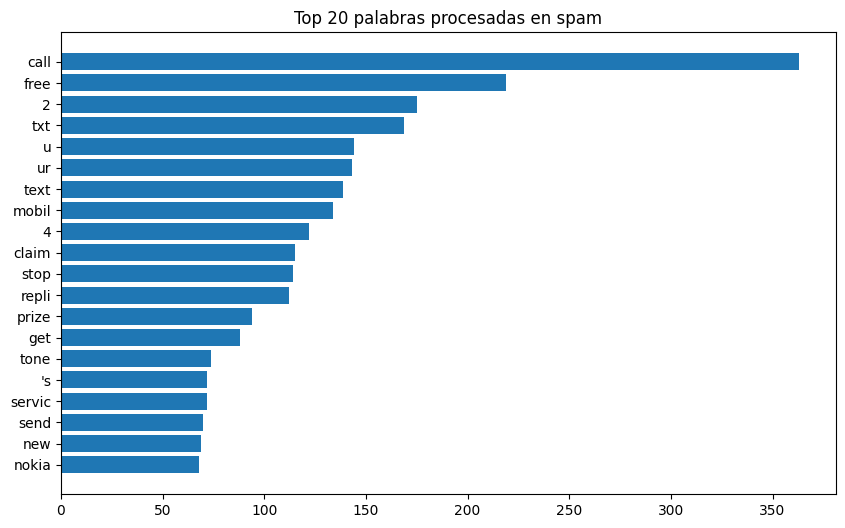

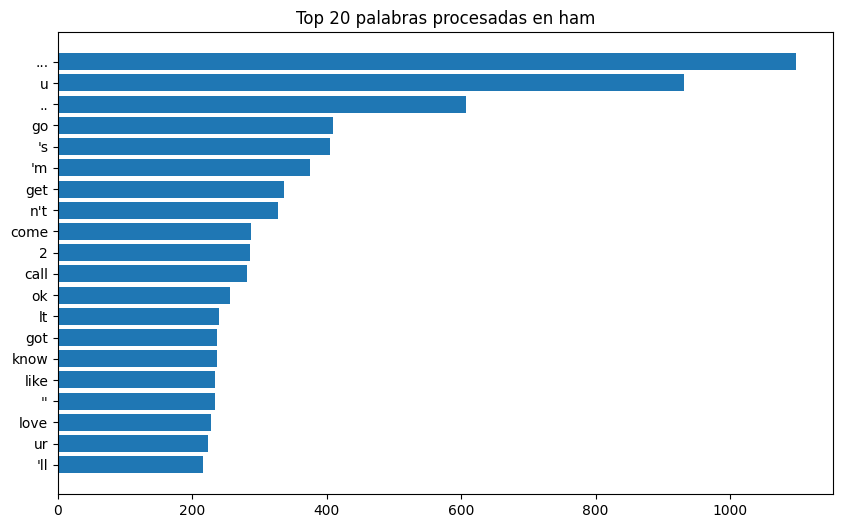

In [19]:
plot_top_words(df[df['Label'] == 'spam']['Processed_Text'], 'Top 20 palabras procesadas en spam')
plot_top_words(df[df['Label'] == 'ham']['Processed_Text'], 'Top 20 palabras procesadas en ham')

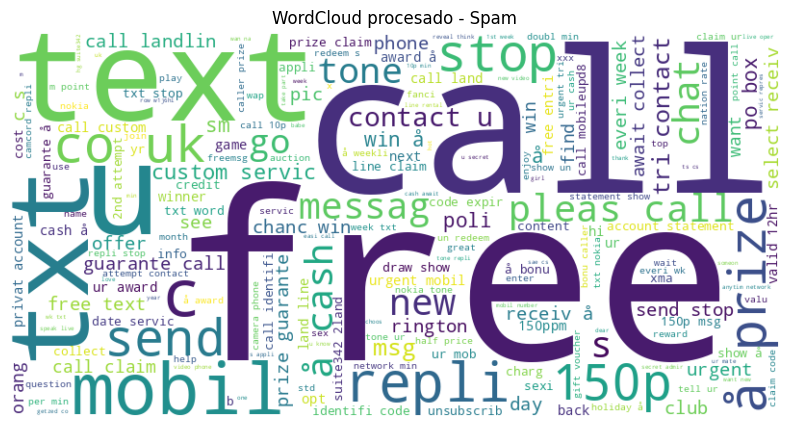

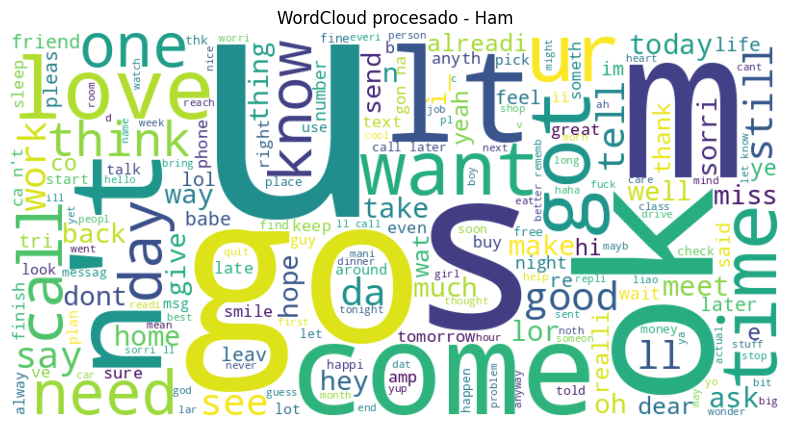

In [20]:
generate_wordcloud(' '.join(df[df['Label'] == 'spam']['Processed_Text']), 'WordCloud procesado - Spam')
generate_wordcloud(' '.join(df[df['Label'] == 'ham']['Processed_Text']), 'WordCloud procesado - Ham')